In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
user_visits = pd.read_csv("UserVisits.csv")
user_visits['visit_date'] = pd.to_datetime(user_visits['visit_date'])
user_visits = user_visits.sort_values(['user_id','visit_date'])

user_visits['next_visit'] = user_visits.groupby(['user_id']).shift(periods = -1).fillna('2021-01-01')
# # 求出日期差值，注意这里最后一定要加上dt.days，不然return出来的是“x days”，而加上dt.days返回的就是一个数了
user_visits['days'] = (user_visits['next_visit'] - user_visits['visit_date']).dt.days

res = user_visits.groupby(['user_id'], as_index = False).days.max()
res

,user_id,days
0,1,39
1,2,65
2,3,51


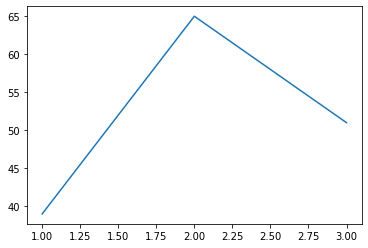

In [20]:
plt.figure()
plt.plot(res['user_id'],res['days'])
plt.show()